In [1]:
%cd ../py3
import os
wd = os.path.dirname(os.getcwd())
os.environ['PYTHONPATH'] = wd

/mnt/ceph/users/zzhang/pnet_prostate_paper/py3


In [2]:
from config_path import PROSTATE_LOG_PATH, POSTATE_PARAMS_PATH

import imp
import tensorflow as tf

In [3]:
params_file = './pnet/onsplit_average_reg_10_tanh_large_testing'
log_dir = os.path.join(PROSTATE_LOG_PATH, params_file)
log_dir = log_dir
params_file = os.path.join(POSTATE_PARAMS_PATH, params_file)

In [4]:
params_file_full = params_file + '.py'
print(params_file_full)
params = imp.load_source(params_file, params_file_full)

/mnt/ceph/users/zzhang/pnet_prostate_paper/train/params/P1000/./pnet/onsplit_average_reg_10_tanh_large_testing.py


Using TensorFlow backend.


In [5]:
params.pipeline

{'type': 'one_split', 'params': {'save_train': True, 'eval_dataset': 'test'}}

In [6]:
from model.model_factory import get_model
from model.nn import Model

In [7]:
# model inherits a sklearn BaseEstimator
model = Model(**params.models[0]['params'])
model.get_params()

{'model_params': {'use_bias': True,
  'w_reg': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
  'w_reg_outcomes': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
  'dropout': [0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
  'loss_weights': [2, 7, 20, 54, 148, 400],
  'optimizer': 'Adam',
  'activation': 'tanh',
  'data_params': {'id': 'ALL',
   'type': 'prostate_paper',
   'params': {'data_type': ['mut_important', 'cnv_del', 'cnv_amp'],
    'drop_AR': False,
    'cnv_levels': 3,
    'mut_binary': True,
    'balanced_data': False,
    'combine_type': 'union',
    'use_coding_genes_only': True,
    'selected_genes': 'tcga_prostate_expressed_genes_and_cancer_genes.csv',
    'training_split': 0}},
  'add_unk_genes': False,
  'shuffle_genes': False,
  'kernel_initializer': 'lecun_uniform',
  'n_hidden_layers': 5,
  'attention': False,
  'dropout_testing': False},
 'fitting_params': {'samples_per_epoch': 10,
  'select_best_model': False,
  'monitor': 'val_o6_f1',
  'verbose': 2,
  'epoch': 300,
  'shuffle':

In [8]:
ret = model.build_fn(**model.model_params)
keras_mod, feature_names = ret

{'id': 'ALL', 'type': 'prostate_paper', 'params': {'data_type': ['mut_important', 'cnv_del', 'cnv_amp'], 'drop_AR': False, 'cnv_levels': 3, 'mut_binary': True, 'balanced_data': False, 'combine_type': 'union', 'use_coding_genes_only': True, 'selected_genes': 'tcga_prostate_expressed_genes_and_cancer_genes.csv', 'training_split': 0}}
n_hidden_layers 5


W0331 16:55:56.548525 140150920030016 data_reader.py:64] some genes dont exist in the original data set
W0331 16:56:02.949182 140150920030016 data_reader.py:64] some genes dont exist in the original data set
W0331 16:56:07.643125 140150920030016 data_reader.py:64] some genes dont exist in the original data set
W0331 16:56:13.105848 140150920030016 deprecation_wrapper.py:119] From /mnt/home/zzhang/anaconda3/envs/decan/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0331 16:56:13.125757 140150920030016 deprecation_wrapper.py:119] From /mnt/home/zzhang/anaconda3/envs/decan/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(1011, 27687)
(1011, 1)
(1011,)
(27687,)
input dimension 27687 self.units 9229
n_inputs_per_node 3
self.kernel_initializer <keras.regularizers.L1L2 object at 0x7f76e8379910> <keras.initializers.VarianceScaling object at 0x7f76e837a510> <keras.regularizers.L1L2 object at 0x7f76e8379910>
input dimensions (None, 27687)


/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:145: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name="o_linear0", kernel_regularizer=<keras.reg...)`
  decision_outcome = Dense(1, activation='linear', name='o_linear{}'.format(0), W_regularizer=reg_l(w_reg_outcome0))(
/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:162: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name="o_linear1", kernel_regularizer=<keras.reg...)`
  W_regularizer=reg_l(w_reg_outcome1 / 2.))(outcome)


layer # 0
pathways 1387
genes 9275
filtered_map (9229, 0)
filtered_map (9229, 0)
filtered_map (9229, 0)
layer # 1
pathways 1066
genes 1399
filtered_map (1387, 0)
filtered_map (1387, 0)
filtered_map (1387, 0)
layer # 2
pathways 447
genes 1068
filtered_map (1066, 0)
filtered_map (1066, 0)
filtered_map (1066, 0)
layer # 3
pathways 147
genes 448
filtered_map (447, 0)
filtered_map (447, 0)
filtered_map (447, 0)
layer # 4
pathways 26
genes 147
filtered_map (147, 0)
filtered_map (147, 0)
filtered_map (147, 0)
layer # 5
pathways 1
genes 26
filtered_map (26, 0)
filtered_map (26, 0)
filtered_map (26, 0)
original dropout [0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
dropout [1, 2, 3, 4, 5] [0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
layer 0, dropout  0.1 w_reg 0.001


/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:228: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name="o_linear2", kernel_regularizer=<keras.reg...)`
  W_regularizer=reg_l(w_reg_outcome))(outcome)
/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:228: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name="o_linear3", kernel_regularizer=<keras.reg...)`
  W_regularizer=reg_l(w_reg_outcome))(outcome)
/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:228: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name="o_linear4", kernel_regularizer=<keras.reg...)`
  W_regularizer=reg_l(w_reg_outcome))(outcome)
/mnt/ceph/users/zzhang/pnet_prostate_paper/py3/model/builders/builders_utils.py:228: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", name

layer 1, dropout  0.1 w_reg 0.001
layer 2, dropout  0.1 w_reg 0.001
layer 3, dropout  0.1 w_reg 0.001
layer 4, dropout  0.1 w_reg 0.001
Compiling...
loss_weights [2, 7, 20, 54, 148, 400]
[<keras.engine.input_layer.InputLayer object at 0x7f76e8379c50>, <model.layers_custom.Diagonal object at 0x7f76e83798d0>, <keras.layers.core.Dropout object at 0x7f76e836a3d0>, <model.layers_custom.SparseTF object at 0x7f76e5468750>, <keras.layers.core.Dropout object at 0x7f76e546a210>, <model.layers_custom.SparseTF object at 0x7f76e5481410>, <keras.layers.core.Dropout object at 0x7f76e51fd350>, <model.layers_custom.SparseTF object at 0x7f76e51d1690>, <keras.layers.core.Dropout object at 0x7f76e51e0110>, <model.layers_custom.SparseTF object at 0x7f76e51e3210>, <keras.layers.core.Dropout object at 0x7f76e545b310>, <model.layers_custom.SparseTF object at 0x7f76dbee43d0>, <keras.layers.core.Dense object at 0x7f76e836f050>, <keras.layers.core.Dense object at 0x7f76e5468350>, <keras.layers.core.Dense object 

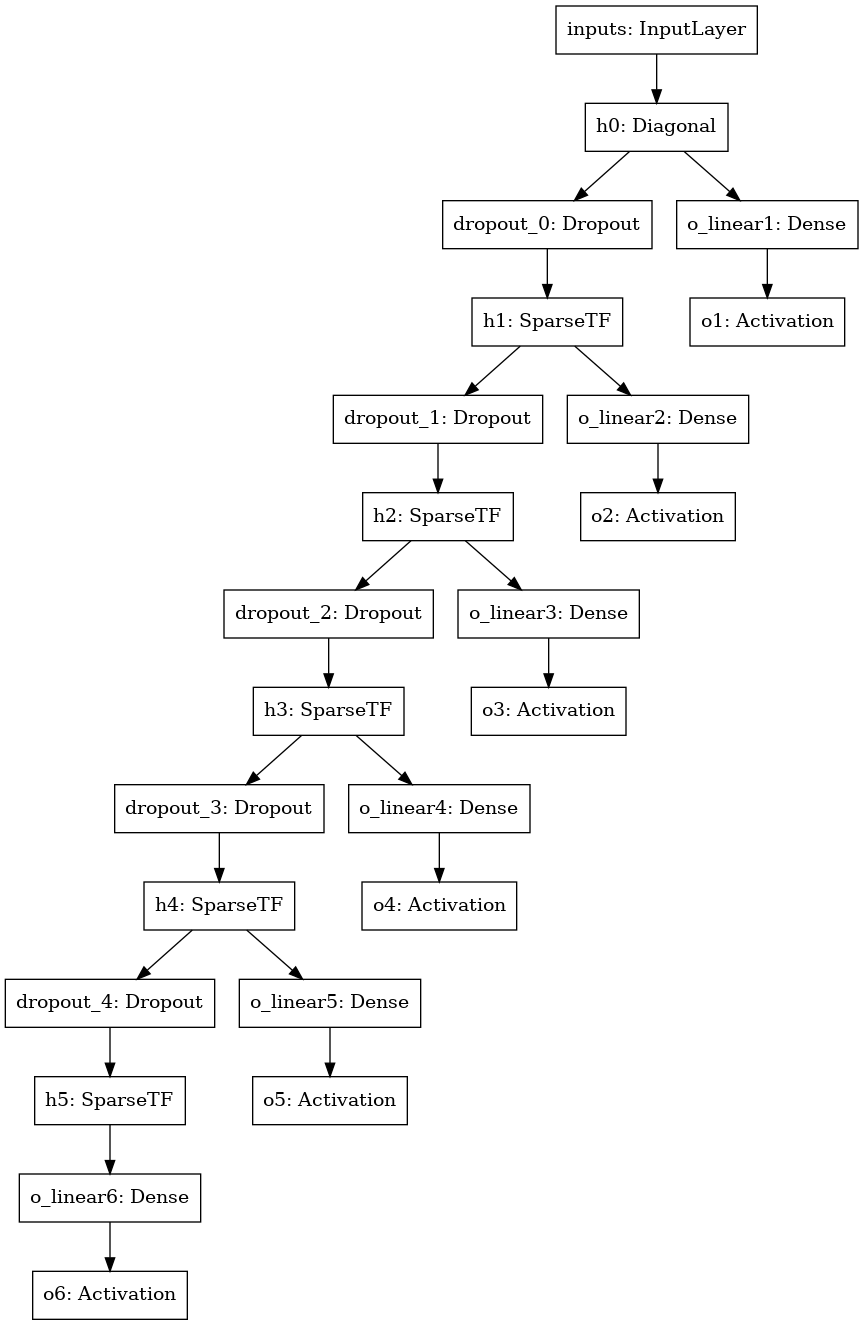

In [9]:
tf.keras.utils.plot_model(keras_mod)

In [10]:
layer_dict = {x.name:x for x in keras_mod.layers}

In [11]:
layer_dict['h1'].get_weights()[0].shape

W0331 16:56:24.032466 140150920030016 deprecation_wrapper.py:119] From /mnt/home/zzhang/anaconda3/envs/decan/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



(15651,)

`Diagnol` is the layer that takes the weighted sum of each features (i.e., mutation, amplification and deletion) to get the gene-level feature (a scalar).

The way it works is this:
```
kernel = K.reshape(self.kernel, (1, n_features))  # n_features = n_inputs_per_node x n_genes
mult = x * kernel                                 # element-wise mult
mult = K.reshape(mult, (-1, self.n_inputs_per_node))  # reshape to (None, n_genes, n_inputs_per_node)
mult = K.sum(mult, axis=1)                        # reshape to (None, n_genes, 1)
output = K.reshape(mult, (-1, self.units))        # reshape to (None, n_genes)

```

Only needs to input the number of `units`, or n_genes, to construct.


`SparseTF` is the layer that uses a pre-defined connectivity `map` to take weighted sums from specified input features, e.g., from gene sets (N genes) to a pathway activity (a scalar).

`map` is (n_input, n_outs) matrix with one-hot encoded connections

`nonzero_ind` is (?, 2) matrix of all (x,y)-indices for 1s in `map`
- it's n_rows is `nonzero_number`

`kernel_shape` is a tuple=(n_input, n_output); same as `map.shape`  

`kernel_vector` is a vector of length `nonzero_number`

The way it works is
```
tt = tf.scatter_nd(self.nonzero_ind, self.kernel_vector, self.kernel_shape)
output = K.dot(inputs, tt)
```

See tf.scatter_nd: https://www.tensorflow.org/api_docs/python/tf/scatter_nd
```
tf.scatter_nd(
    indices, updates, shape, name=None
)
```
What it does is to scatter a dense array `updates` to sparse locations in a sparse matrix of (`dimension`), with location indices given by `indices`.

